In [1]:
from rocketpy.motors import HybridMotor, CylindricalTank
from rocketpy.motors.Tank import  MassFlowRateBasedTank
from rocketpy.motors import Fluid
from rocketpy import Function

from math import exp

In [2]:
tank_shape = CylindricalTank(115/2000, 0.705)

In [3]:
oxidizer_liq = Fluid(name="N2O_l", density=1220, quality=1)
oxidizer_gas = Fluid(name="N2O_g", density=1.9277, quality=1)

oxidizer_tank = MassFlowRateBasedTank(
    name="oxidizer tank",
    geometry=tank_shape,
    flux_time=(5.2),
    initial_liquid_mass=4.11,
    initial_gas_mass=0,
    liquid_mass_flow_rate_in=0,
    liquid_mass_flow_rate_out=(4.11 - 0.5) / 5.2,
    gas_mass_flow_rate_in=0,
    gas_mass_flow_rate_out=0,
    liquid=oxidizer_liq,
    gas=oxidizer_gas
)

In [4]:
hybrid_motor = HybridMotor(
    thrustSource=lambda t: 2000 - (2000 - 1400) / 5.2 * t,
    dry_mass=100,
    dry_inertia=(0,0,0),
    center_of_dry_mass=550/ 2000 + 109/1000,
    burn_time=5.2,
    reshapeThrustCurve=False,
    grainNumber=4,
    grainSeparation=0,
    grainOuterRadius=115 / 2000,
    grainInitialInnerRadius=0.05 / 2,
    grainInitialHeight=550 / 4000,
    grainDensity=900,
    nozzleRadius=63.36/2000,
    throatRadius=26/2000,
    interpolationMethod="linear",
    grainsCenterOfMassPosition=550/ 2000 + 109/1000
)

In [5]:
hybrid_motor.addTank(oxidizer_tank, 2*550/ 2000 + 109/1000 + 0.705/2)

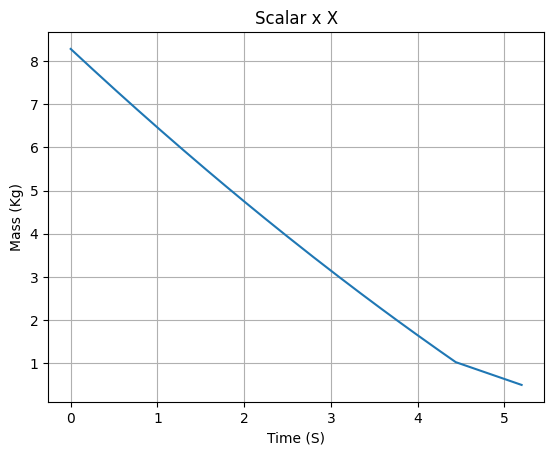

In [6]:
#TODO: mass not burning completely. Is this right?
hybrid_motor.propellantMass.plot(0,5.2)

In [7]:
hybrid_motor.propellantInitialMass


8.27958067470663

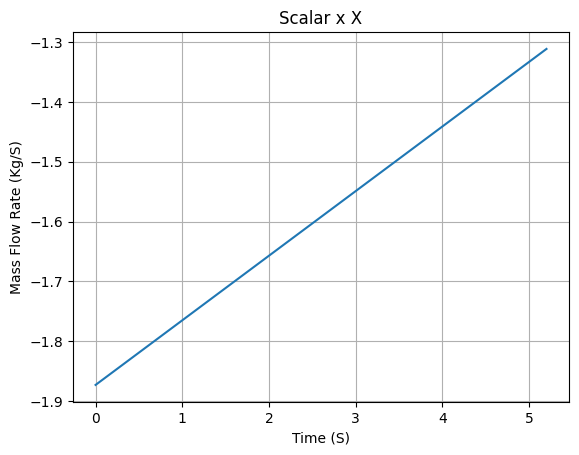

In [8]:
# TODO why isnt there a change in variation in the mass flow rate?
hybrid_motor.massFlowRate.plot(0,5.2)

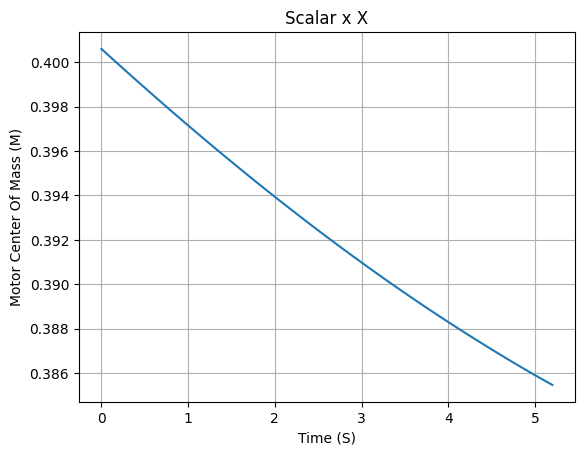

In [9]:
#TODO center of mass starts going back?
hybrid_motor.centerOfMass.plot(0,5.2, samples=50)

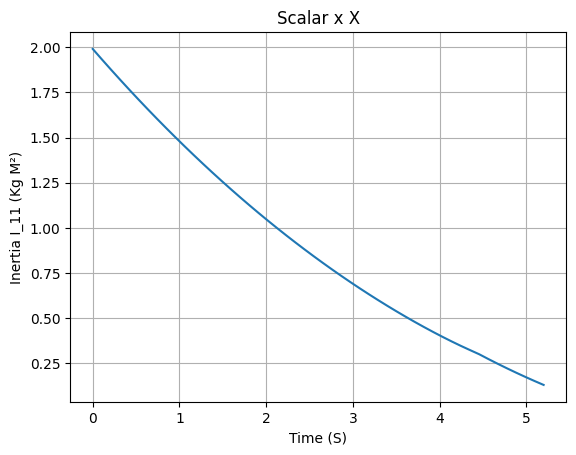

In [10]:
hybrid_motor.I_11.plot(0,5.2, samples=50)

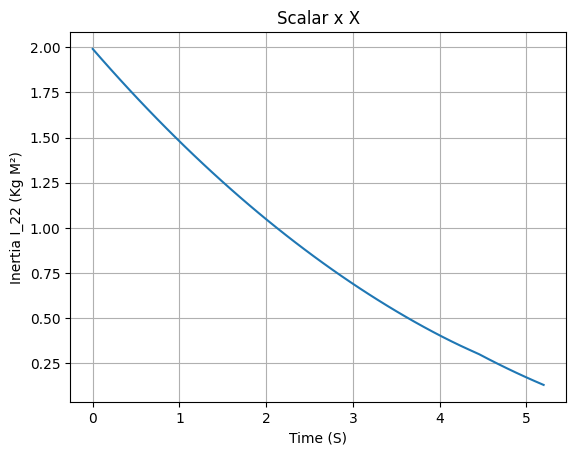

In [11]:
hybrid_motor.I_22.plot(0,5.2, samples=50)

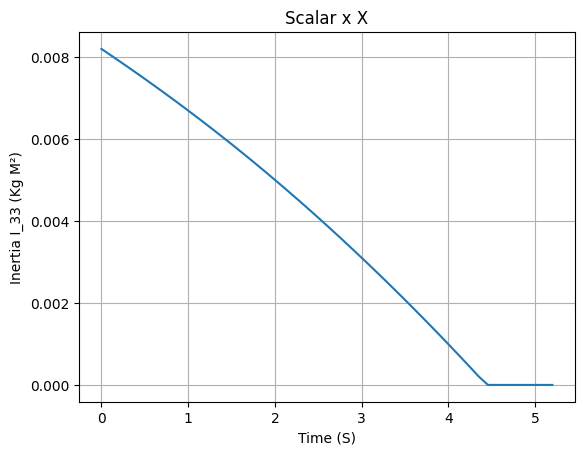

In [12]:
hybrid_motor.I_33.plot(0,5.2, samples=50)

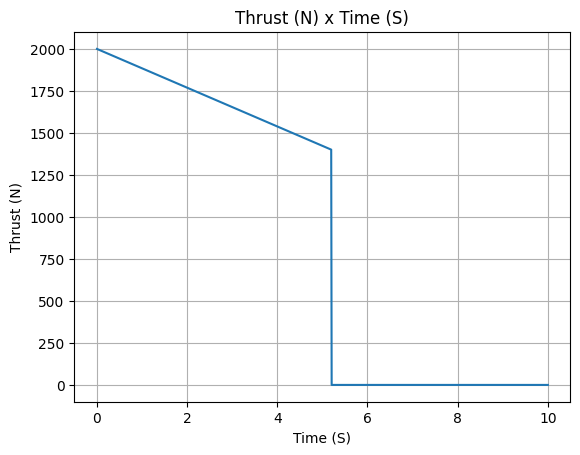

In [13]:
hybrid_motor.thrust.plot(0,10)

Nozzle Details
Nozzle Radius: 0.03168 m
Nozzle Throat Radius: 0.013 m

Grain Details
Number of Grains: 4
Grain Spacing: 0 m
Grain Density: 900 kg/m3
Grain Outer Radius: 0.0575 m
Grain Inner Radius: 0.025 m
Grain Height: 0.1375 m
Grain Volume: 0.001 m3
Grain Mass: 1.042 kg

Motor Details
Total Burning Time: 5.2 s
Total Propellant Mass: 8.280 kg
Average Propellant Exhaust Velocity: 1067.687 m/s
Average Thrust: 1700.000 N
Maximum Thrust: 2000.0 N at 0.0 s after ignition.
Total Impulse: 8840.000 Ns

Plots


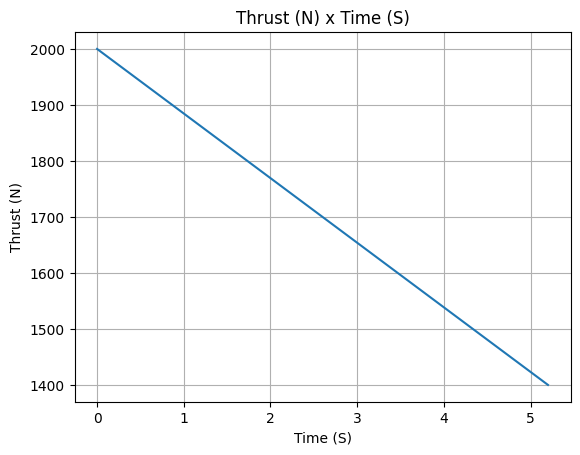

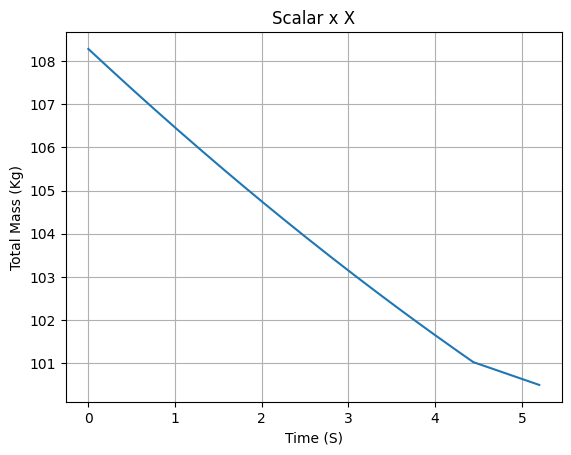

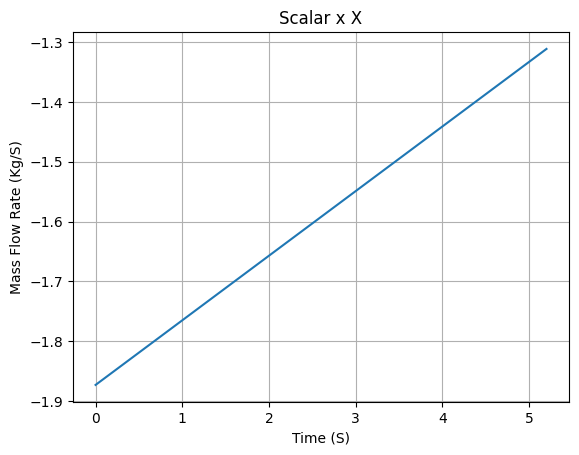

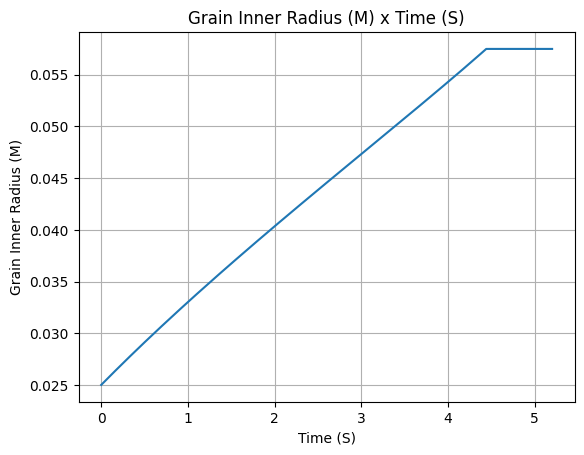

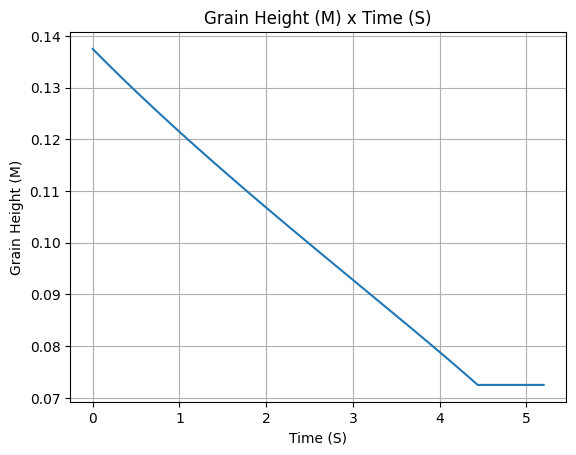

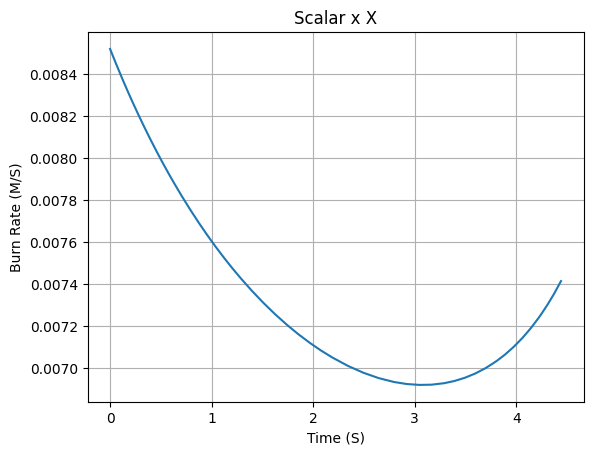

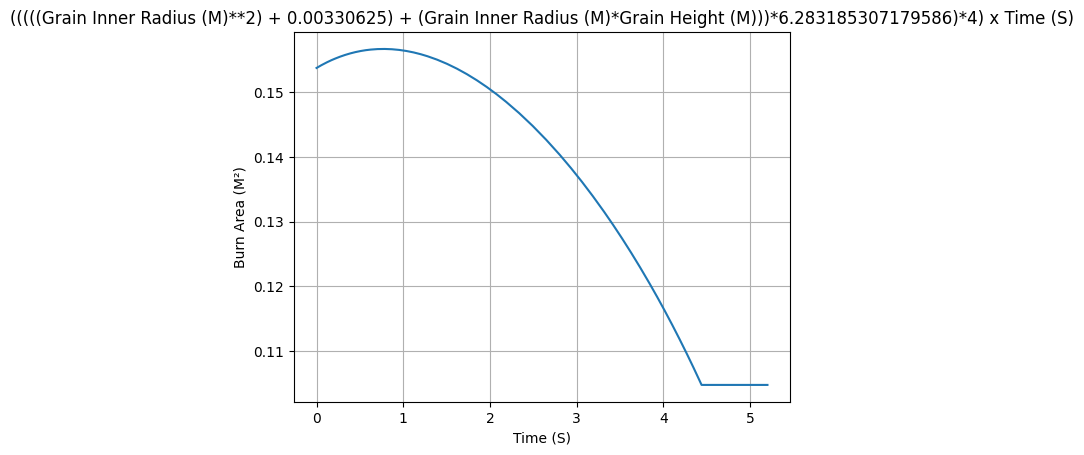

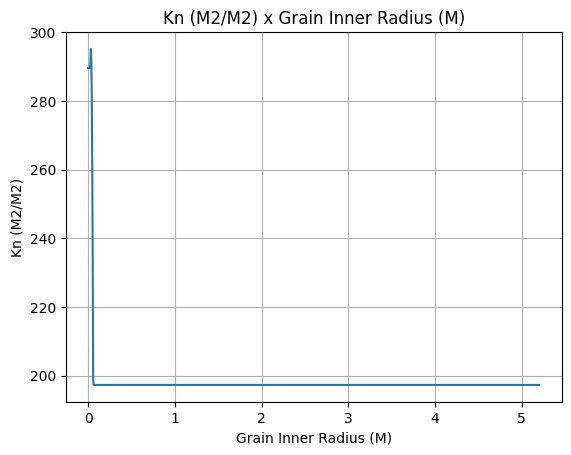

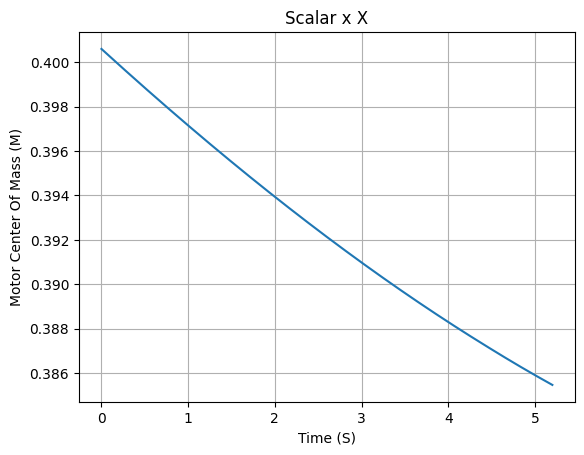

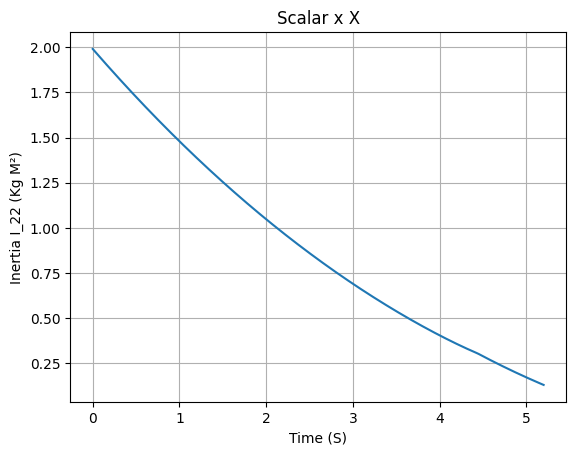

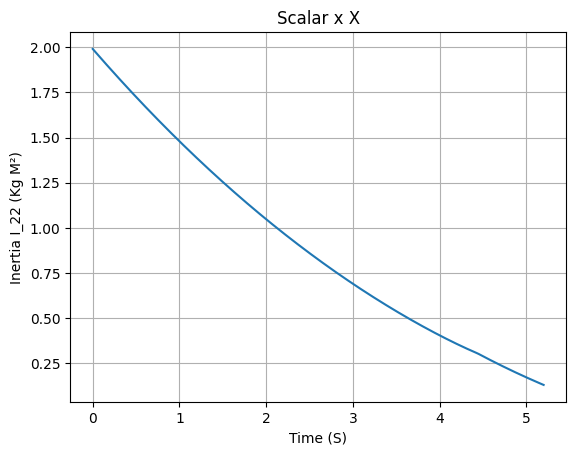

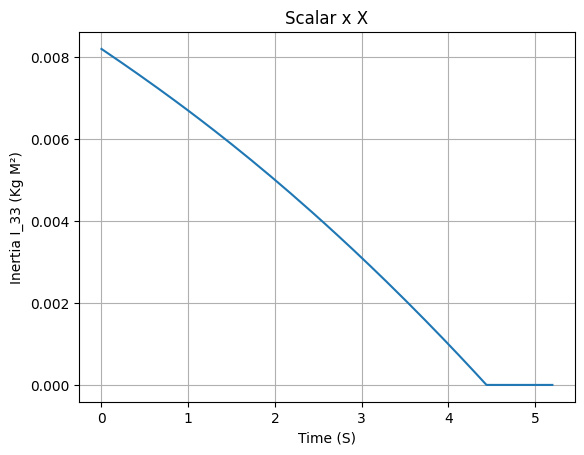

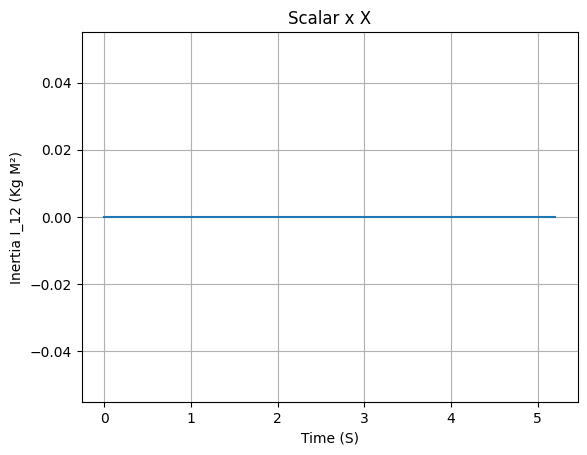

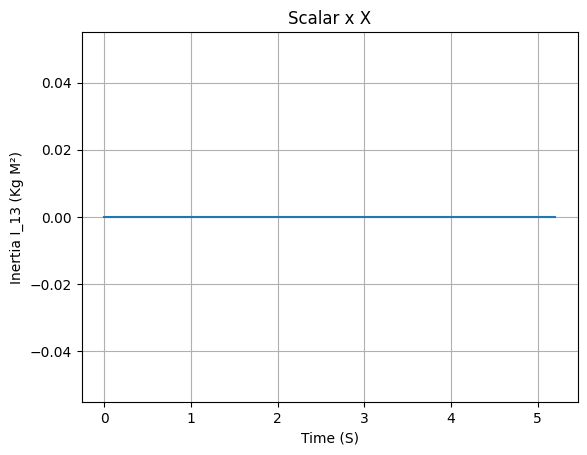

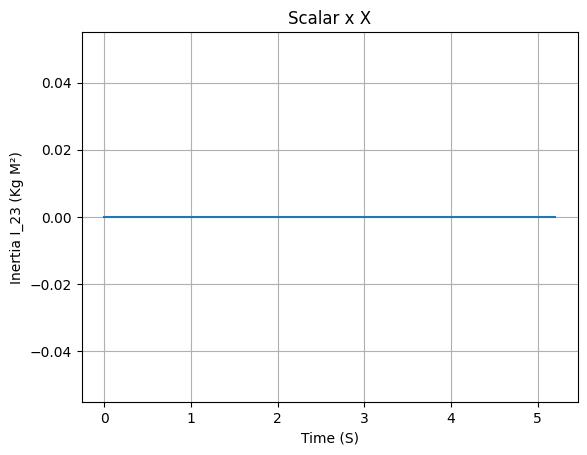

In [14]:
hybrid_motor.allInfo()